In [4]:
import matplotlib.pyplot as plt
import numpy as np

 A. Compute the number of distinct authors, publication venues, publications, and citations/references

In [1]:
def add_authors(line, authors):
    line = line [3:]
    book_authors = line.split(";")
    for author in book_authors:
        authors.add(author.strip())
    return authors

authors = set()
publication_venus = set()
number_of_pulications = 0
number_of_citations = 0

file = open("AP_train.txt", 'r')

for line in file:
    if line.startswith("#@"):
        authors = add_authors(line, authors)

    if line.startswith("#c"):
        publication_venus.add(line[3:])

    if line.startswith("#index"):
        number_of_pulications += 1

    if line.startswith("#%"):
        number_of_citations += 1

print("Number of unique authors: " + str(len(authors)))
print("Number of publication venus: " + str(len(publication_venus)))
print("Number of publications: " + str(number_of_pulications))
print("Number of citations: " + str(number_of_citations))

Number of unique authors: 1478734
Number of publication venus: 255686
Number of publications: 1976815
Number of citations: 7250326


B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?

In [2]:
file = open("AP_train.txt", 'r')

venu_list = set()
print("Venues associated with Principles and Practice of Knowledge Discovery in Databases:\n")
for line in file:
    if line.startswith("#c") and "Principles and Practice of Knowledge Discovery in Databases" in line:
        venu_list.add(line[3:])
for venu in venu_list:
    print(venu)

Venues associated with Principles and Practice of Knowledge Discovery in Databases:

Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)



C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

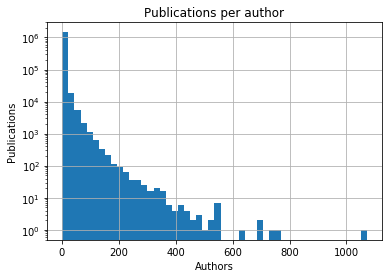

In [19]:
author_publication_list = {}

file = open("AP_train.txt", 'r')
for line in file:
    if line.startswith("#@"):
        authors = line[3:].split(";")
        for author in authors:
            if author.strip() in author_publication_list:
                author_publication_list[author.strip()] += 1
            else:
                author_publication_list[author.strip()] = 1
        
del author_publication_list['']
plt.xlabel('Authors')
plt.ylabel('Publications')
plt.title('Publications per author')
plt.grid(True)
plt.hist(list(author_publication_list.values()), bins = 50, log = True)
plt.show()

D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [20]:
print("Mean number of publications", end = ': ')
mean = np.mean(list(author_publication_list.values()))
print(str(mean))

print("Standard deviation", end = ': ')
std = np.std(list(author_publication_list.values()))
print(str(std))

print("Q1: ", end = ': ')
q1 = np.percentile(list(author_publication_list.values()), 25)
print(str(q1))

print("Q2: ", end = ': ')
q2 = np.median(list(author_publication_list.values()))
print(str(q2))

print("Q3: ", end = ': ')
q3 = np.percentile(list(author_publication_list.values()), 75)
print(str(q3))

print("Max publication for an author", end = ': ')
max_pub = np.max(list(author_publication_list.values()))
print(str(max_pub))

print("Min publication for an author", end = ': ')
min_pub = np.min(list(author_publication_list.values()))
print(str(min_pub))



Mean number of publications: 3.291785602945224
Standard deviation: 8.871889691039373
Q1: : 1.0
Q2: : 1.0
Q3: : 2.0
Max publication for an author: 1071
Min publication for an author: 1


> The above stats reveal that a large number of authors have only one publication, which is why the median and the first quartlie is 1.
> There also are a few authors with large number of publications which shifts the mean to a value greater than 3 even though the medain and the first quartile is 1

E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

Mean number of publications per venu: 7.731416659496413
Standard deviation: 83.38105610357532
Q1: 1.0
Median: 1.0
Q3: 1.0
Venu with largest number of pulications:  IEEE Transactions on Information Theory

Number of publications in above venu: 11227


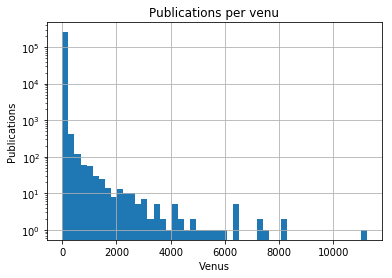

In [7]:
file = open("AP_train.txt", 'r')
venu_list = {}

for line in file:
    line_parts = line.split()
    if(line .startswith("#c")):
        venu = line[3:]
        if venu in venu_list:
            venu_list[venu] = venu_list[venu] + 1
        else:
            venu_list[venu] = 1

number_of_pub_per_venu = list(venu_list.values())

print("Mean number of publications per venu: " + str(np.mean(number_of_pub_per_venu)))
print("Standard deviation: " + str(np.std(number_of_pub_per_venu)))
print("Q1: " + str(np.percentile(number_of_pub_per_venu, 25)))
print("Median: " + str(np.median(number_of_pub_per_venu)))
print("Q3: " + str(np.percentile(number_of_pub_per_venu, 75)))

venu_with_largest_no_of_publication = ''
largest_number_of_publication = 0

for venu in venu_list:
    number_of_pulications = venu_list[venu]
    if number_of_pulications > largest_number_of_publication:
        largest_number_of_publication = number_of_pulications
        venu_with_largest_no_of_publication = venu

print("Venu with largest number of pulications: ", end = " ")
print(venu_with_largest_no_of_publication)
print("Number of publications in above venu:", end = " ") 
print(str(venu_list[venu_with_largest_no_of_publication]))

plt.xlabel('Venus')
plt.ylabel('Publications')
plt.title('Publications per venu')
plt.grid(True)
plt.hist(number_of_pub_per_venu, bins = 50, log = True)
plt.show()

F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

Total number of references: 7250326
Total number of citations: 7250326
Publication with largest number of references: 719353
Publication with largest number of citations: 408396


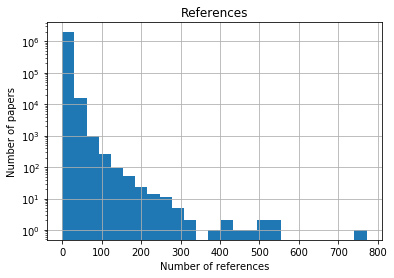

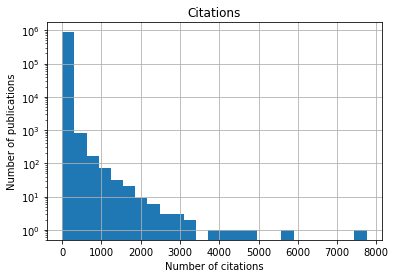

In [8]:
file = open("AP_train.txt", 'r')
reference_dict = {}
citation_dict = {}
total_references = 0
total_citations = 0

index = ""
for line in file:
    line_parts = line.split()
    if line .startswith("#index"):
        index = line_parts[1]
        reference_dict[index] = 0
    if line .startswith("#%"):
        reference_dict[index] = reference_dict[index] + 1
        if line_parts[1] in citation_dict:
            citation_dict[line_parts[1]] = citation_dict[line_parts[1]] + 1
        else:
            citation_dict[line_parts[1]] = 1

pub_with_largest_ref = ""
largest_ref = 0
for paper_index in reference_dict.keys():
    total_references += reference_dict[paper_index]
    if reference_dict[paper_index] > largest_ref:
        largest_ref = reference_dict[paper_index]
        pub_with_largest_ref = paper_index

pub_with_largest_cit = ""
largest_cit = 0
for paper_index in citation_dict:
    total_citations += citation_dict[paper_index]
    if citation_dict[paper_index] > largest_cit:
        largest_cit = citation_dict[paper_index]
        pub_with_largest_cit = paper_index

print("Total number of references: " + str(total_references))
print("Total number of citations: " + str(total_citations))
print("Publication with largest number of references: " + pub_with_largest_ref)
print("Publication with largest number of citations: " + pub_with_largest_cit)

plt.xlabel('Number of references')
plt.ylabel('Number of papers')
plt.title('References')
plt.grid(True)
plt.hist(list(reference_dict.values()), bins = 25, log = True)
plt.show()

plt.xlabel('Number of citations')
plt.ylabel('Number of publications')
plt.title('Citations')
plt.grid(True)
plt.hist(list(citation_dict.values()), bins = 25, log = True)
plt.show()

G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

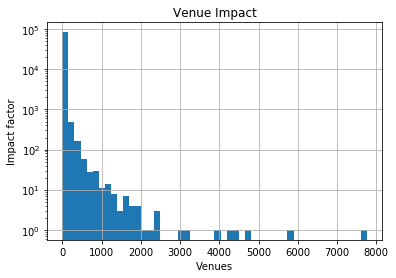

In [9]:
def total_citation_per_venu(path):
    path = "AP_train.txt"
    index_venu_dict = create_index_venu_dict(path)
    file = open(path, 'r')
    citations_per_venu_dict = {}

    for line in file:
        if line.startswith("#%"):
            index = line.split()[1]
            if index in index_venu_dict:
                venu = index_venu_dict[index]
                if venu in citations_per_venu_dict:
                    citations_per_venu_dict[venu] += 1
                else:
                    citations_per_venu_dict[venu] = 1
    return citations_per_venu_dict

def create_venu_publication_dict(path):
    file = open(path, 'r')
    venu_no_of_pub_dict = {}
    for line in file:
        if line.startswith("#c"):
            venu = line[3:].replace('\n', '')
            if venu in venu_no_of_pub_dict:
                venu_no_of_pub_dict[venu] += 1
            else:
                venu_no_of_pub_dict[venu] = 1

    return venu_no_of_pub_dict

def create_index_venu_dict(path):
    file = open(path, 'r')
    index_venu_dict = {}
    for line in file:
        line_parts = line.split()

        if line != "\n":
            if line_parts[0] == "#index":
                index = line_parts[1]
            if line_parts[0] == "#c":
                index_venu_dict[index] = line[3:]

    return index_venu_dict

path = "AP_train.txt"
cite_per_venu_dict = total_citation_per_venu(path)
venu_no_of_pub_dict = create_venu_publication_dict(path)
impact_factor_dict = {}

for venu in cite_per_venu_dict:
    if venu.replace('\n', '') in venu_no_of_pub_dict:
        impact_factor_dict[venu.replace('\n', '')] = cite_per_venu_dict[venu] / venu_no_of_pub_dict[venu.replace('\n', '')]


plt.xlabel('Venues')
plt.ylabel('Impact factor')
plt.title('Venue Impact')
plt.grid(True)
plt.hist(list(impact_factor_dict.values()), bins = 50, log = True)
plt.show()

H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

In [10]:
max_citation_count = 0
highest_impact_factor_venu = ""
for venu in impact_factor_dict.keys():
    if impact_factor_dict[venu] > max_citation_count:
        max_citation_count = impact_factor_dict[venu]
        highest_impact_factor_venu = venu

print("Venu with highest impact factor: " + highest_impact_factor_venu)


Venu with highest impact factor: Computers and Intractability: A Guide to the Theory of NP-Completeness


> Since impact factor of a venu depends on the reliability of the data (i.e how the venu is recorded for each publication) the data cannot be trusted as certain venues are recorded differently for different publications:
Eg. Communication of the ACM is also recorded as Communicatioins of the ACM (ACM) for certian records

I. Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

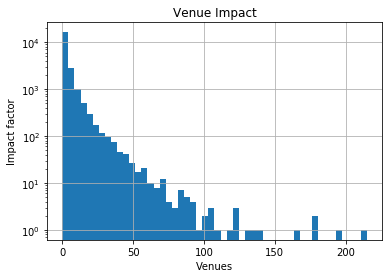

Venu with highest impact factor: Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications
Impact factor of above venu: 214.82608695652175
Median number of citation: 66544.0


In [11]:
impact_factor_dict = {}

for venu in cite_per_venu_dict:
    if venu.replace('\n', '') in venu_no_of_pub_dict and venu_no_of_pub_dict[venu.replace('\n', '')] > 10:
        impact_factor_dict[venu.replace('\n', '')] = cite_per_venu_dict[venu] / venu_no_of_pub_dict[venu.replace('\n', '')]


plt.xlabel('Venues')
plt.ylabel('Impact factor')
plt.title('Venue Impact')
plt.grid(True)
plt.hist(list(impact_factor_dict.values()), bins = 50, log = True)
plt.show()

max_citation_count = 0
highest_impact_factor_venu = ""
for venu in impact_factor_dict.keys():
    if impact_factor_dict[venu] > max_citation_count:
        max_citation_count = impact_factor_dict[venu]
        highest_impact_factor_venu = venu

print("Venu with highest impact factor: " + highest_impact_factor_venu)
print("Impact factor of above venu: " + str(impact_factor_dict[highest_impact_factor_venu]))
print("Median number of citation: " + str(np.median(np.array(list(cite_per_venu_dict.values()))[0])))

J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

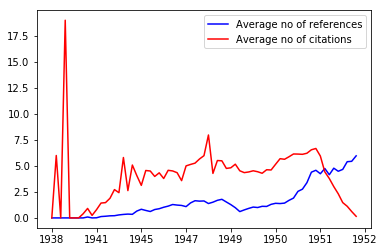

In [41]:
file = open("AP_train.txt", 'r')

year_pub_dict = {}
year_ref_dict = {}
year_cite_dict = {}

for line in file:
    if line.startswith("#index"):
        index = line.split()[1]
        if index in citation_dict:
            number_of_times_index_cited = citation_dict[index]
    
    if line.startswith("#t"):
        year = line[3:].replace('\n', '')
        if index in citation_dict:
            if year in year_cite_dict:
                year_cite_dict[year] += number_of_times_index_cited
            else:
                year_cite_dict[year] = number_of_times_index_cited
            
        if year in year_pub_dict:
            year_pub_dict[year] += 1
        else:
            year_pub_dict[year] = 1
    if line.startswith("#%"):
        if year in year_ref_dict:
            year_ref_dict[year] += 1
        else:
            year_ref_dict[year] = 1

avg_ref_per_year = {}
for year in sorted(year_ref_dict.keys()):
    avg_ref_per_year[year] = year_ref_dict[year] / year_pub_dict[year] 

avg_cite_per_year = {}
for year in sorted(year_cite_dict.keys()):
    avg_cite_per_year[year] = year_cite_dict[year] / year_pub_dict[year]

x = sorted(list(year_pub_dict.keys()))
x.pop(0)

for year in x:
    if year not in avg_ref_per_year:
        avg_ref_per_year[year] = 0
    if year not in avg_cite_per_year:
        avg_cite_per_year[year] = 0
        
y1 = [avg_ref_per_year[i] for i in x]
y2 = [avg_cite_per_year[i] for i in x]


figure, ax = plt.subplots()
ax.plot(x, y1, 'b' , label = 'Average no of references')
ax.plot(x, y2, 'r' , label = 'Average no of citations')
legend = ax.legend(loc = 'upper right')
max_xticks = 8
xloc = plt.MaxNLocator(max_xticks)
ax.xaxis.set_major_locator(xloc)
plt.show()